# Introduction :

__This dataset contains information about 100 thouthands patients in Brazil, some information is described in columns names as follows:__

__- ScheduledDay:__ the day in which a patient sets up his/her appointment.

__- Neighborhood:__ location of the hospital.

__- Scholarship:__     whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

__- Hypertension:__ whether or not a patient has hypertension, and the same for Diabetes and Alcoholism.

__- Handicap:__     degree of handicap (5 degrees: 0-5).

__- SMS_received:__ if or not a patient received SMS.

__- No-show:__      if or not a patient showed up to his appointment (note: ‘No’ if a patient showed up to his/her appointment, and ‘Yes’ if not.


# Questions :

__1- What are the proportions of Males and Females in Patients and what is the age distribution?__

__2- What is the effect of alcohol on diabetes and hypertention?__

__3- What is the relation between Age and each of diabetes and hypertension?__

__4- Are there young alcoholics (under 18)?__

__5- What is the percentage of patients who showed up to their appointments?__

__6- Did patients who showed up for their appointments receive SMS?__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# % matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

 ____________________________________________________________________________________________________________________________

# Assessing dataset:

In [2]:
print(noshow_df.shape)
noshow_df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [26]:
noshow_df.duplicated().sum()

0

__- There are no nulls or duplicates.__

In [27]:
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

__- Data_types of 'ScheduledDay' and 'AppointmentDay' need to be converted from object (string) to datetime.__

In [28]:
noshow_df.Gender.unique()

array(['F', 'M'], dtype=object)

In [8]:
noshow_df.Scholarship.unique()

array([0, 1], dtype=int64)

In [9]:
noshow_df.Hipertension.unique()

array([1, 0], dtype=int64)

In [10]:
noshow_df.Diabetes.unique()

array([0, 1], dtype=int64)

In [11]:
noshow_df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [12]:
noshow_df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
noshow_df.SMS_received.unique()

array([0, 1], dtype=int64)

In [17]:
noshow_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

 ____________________________________________________________________________________________________________________________

# Cleaning dataset:

In [29]:
# remove whitespaces, replace hyphens with underscores and lowercase labels
noshow_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# confirm changes
noshow_df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


 ____________________________________________________________________________________________________________________________

In [30]:
# drop ages <= 0
ages_0_or_less_df = noshow_df.query('age<=0')
noshow_df.drop(ages_0_or_less_df.index, inplace=True)

In [31]:
# check for dropping
noshow_df.query('age<=0').age.count()

0

In [32]:
# remove column:'neighbourhood'
noshow_df.drop(['neighbourhood'], axis=1, inplace=True)

In [33]:
# confirm changes
noshow_df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


 ____________________________________________________________________________________________________________________________

In [34]:
# convert data_types of columns: 'scheduledDay' and 'appointmentDay'
noshow_df['scheduledday'] = pd.to_datetime(noshow_df['scheduledday'])
noshow_df['appointmentday'] = pd.to_datetime(noshow_df['appointmentday'])


In [35]:
# confirm changes
print(noshow_df.scheduledday.dtypes)
noshow_df.appointmentday.dtypes

datetime64[ns, UTC]


datetime64[ns, UTC]

 ____________________________________________________________________________________________________________________________

# Exploring with visuals:

# Q1: 

__1- What are the proportions of Males and Females in Patients and what is the age distribution?__

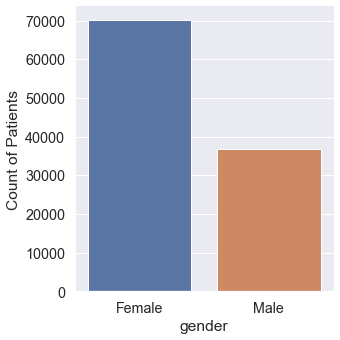

In [37]:
# counts of males and females in patients
sns.catplot(data=noshow_df, x="gender", kind="count")
sns.set(font_scale=1.3)
plt.xticks([1, 0], ['Male', 'Female'])
plt.ylabel('Count of Patients');

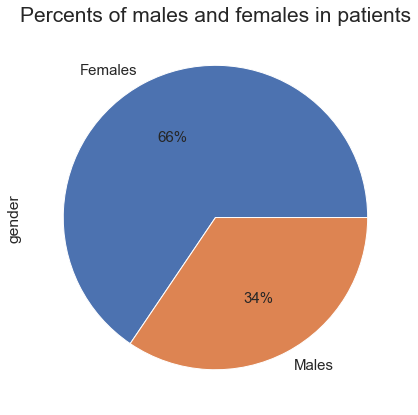

In [63]:
# percents of males and females in patients
noshow_df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={"fontsize":15}, figsize= (7,7),  labels=['Females', 'Males'])
plt.title("Percents of males and females in patients", fontsize = 21);

__- percent of females is about twice the percent of male patients (66% vs 34%).__

 ____________________________________________________________________________________________________________________________

__- Making a function (percent_function).__

In [58]:
# gender count
total_patients = noshow_df.gender.count()
total_patients

106987

In [59]:
# count of males
count_of_M = noshow_df.query('gender=="M"')['gender'].count()
count_of_M

36869

In [60]:
# count of females
count_of_F = noshow_df.query('gender=="F"').gender.count()
count_of_F

70118

In [61]:
# function for extracting percents
def percent_(df, count_, total_):
    df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
    percent_ = count_ / total_ * 100
    return percent_
    

In [62]:
# percents of males and females in patients
print(percent_(noshow_df, count_of_M, total_patients))
percent_(noshow_df, count_of_F, total_patients)

34.461196220101506


65.53880377989849

 ____________________________________________________________________________________________________________________________

# Ages of the patients:

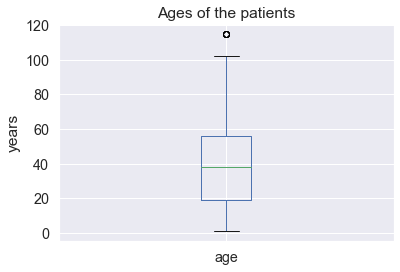

In [80]:
# box plot for column: 'age'
noshow_df['age'].plot(kind='box')

sns.set(font_scale=1.3)
plt.title('Ages of the patients')
plt.ylabel('years');

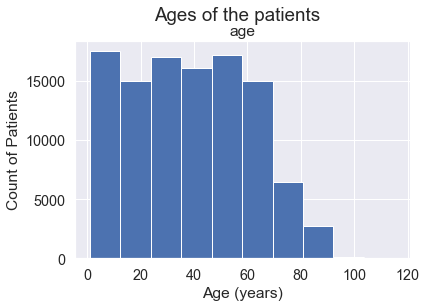

In [81]:
# histogram for column: 'age'
fig, axes = plt.subplots(nrows=1, ncols=1)
noshow_df.hist(column='age', ax=axes)

# set title and axis labels
plt.suptitle('Ages of the patients', x=0.5, y=1, ha='center', fontsize='large')
plt.xlabel('Age (years)')
plt.ylabel('Count of Patients');

__- 'Right skewed', and the majority of patients are under 70.__

 ____________________________________________________________________________________________________________________________

# Q2:

__2- What is the effect of alcohol on diabetes and hypertention?__

In [65]:
# data_frame of alcoholics
df_of_alcoholics = noshow_df.query('alcoholism==1')
# df_of_alcoholics

In [66]:
# count of alcoholics
count_of_alcoholics = noshow_df.query('alcoholism==1').alcoholism.count()
count_of_alcoholics

3360

In [67]:
# data_frame of nonalcoholics
df_of_nonalcoholics = noshow_df.query('alcoholism==0')
# df_of_nonalcoholics

In [68]:
# count of nonalcoholics
count_of_nonalcoholics = noshow_df.query('alcoholism==0').alcoholism.count()
count_of_nonalcoholics

103627

In [69]:
# count of alcoholics who have diabetes
count_of_dibetes_in_alcoholics = df_of_alcoholics.query('diabetes==1').diabetes.count()
count_of_dibetes_in_alcoholics

332

In [70]:
# count of nonalcoholics who have diabetes
count_of_dibetes_in_nonalcoholics = df_of_nonalcoholics.query('diabetes==1').diabetes.count()
count_of_dibetes_in_nonalcoholics

7611

In [71]:
# percent of alcoholics who have diabetes
percent_of_dibetes_in_alcoholics = percent_(df_of_alcoholics, count_of_dibetes_in_alcoholics, count_of_alcoholics)
percent_of_dibetes_in_alcoholics

9.880952380952381

In [72]:
# percent of nonalcoholics who have diabetes
percent_of_dibetes_in_nonalcoholics = percent_(df_of_nonalcoholics, count_of_dibetes_in_nonalcoholics, count_of_nonalcoholics)
percent_of_dibetes_in_nonalcoholics

7.344610960463973

In [73]:
# count of alcoholics who have hipertension
count_of_hipertension_in_alcoholics = df_of_alcoholics.query('hipertension==1').hipertension.count()
count_of_hipertension_in_alcoholics

1327

In [74]:
# count of nonalcoholics who have hipertension
count_of_hipertension_in_nonalcoholics = df_of_nonalcoholics.query('hipertension==1').hipertension.count()
count_of_hipertension_in_nonalcoholics

20474

In [75]:
# percent of alcoholics who have hipertension
percent_of_hipertension_in_alcoholics = percent_(df_of_alcoholics, count_of_hipertension_in_alcoholics, count_of_alcoholics)
percent_of_hipertension_in_alcoholics

39.49404761904762

In [76]:
# percent of nonalcoholics who have hipertension
percent_of_hipertension_in_nonalcoholics = percent_(df_of_nonalcoholics, count_of_hipertension_in_nonalcoholics, count_of_nonalcoholics)
percent_of_hipertension_in_nonalcoholics

19.757399133430475

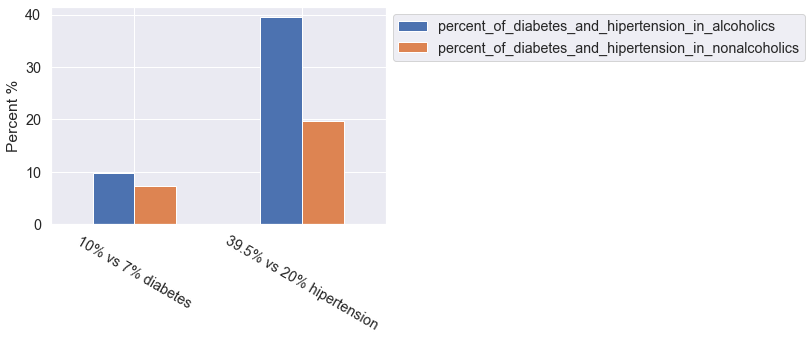

In [82]:
percent_of_diabetes_and_hipertension_in_alcoholics = [percent_of_dibetes_in_alcoholics, percent_of_hipertension_in_alcoholics]
percent_of_diabetes_and_hipertension_in_nonalcoholics = [percent_of_dibetes_in_nonalcoholics, percent_of_hipertension_in_nonalcoholics]
index = ['10% vs 7% diabetes', '39.5% vs 20% hipertension']
df = pd.DataFrame({'percent_of_diabetes_and_hipertension_in_alcoholics': percent_of_diabetes_and_hipertension_in_alcoholics, 'percent_of_diabetes_and_hipertension_in_nonalcoholics': percent_of_diabetes_and_hipertension_in_nonalcoholics}, index=index)
ax = df.plot.bar(rot=-30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Percent %');

__- about 10% of alcoholics have diabetes vs 7% in nonalcoholics__

__- about 39.5% of alcoholics have hipertension vs 20% in nonalcoholics__

 ____________________________________________________________________________________________________________________________

# Q3:

__3- What is the relation between Age and each of diabetes and hypertension?__

In [84]:
# data_frame of diabetes
df_of_diabetes = noshow_df.query('diabetes==1')
# df_of_diabetes

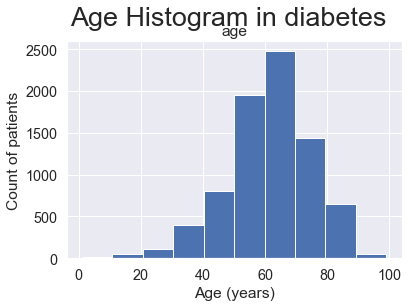

In [85]:
# histogram for column: 'age'
fig, axes = plt.subplots(nrows=1, ncols=1)
df_of_diabetes.hist(column='age', ax=axes)

# set title and axis labels
plt.suptitle('Age Histogram in diabetes', x=0.5, y=1, ha='center', fontsize='xx-large')
plt.xlabel('Age (years)')
plt.ylabel('Count of patients');

__- 'Left skewed', and the majority of diabetes are between 50 and 80 years old.__

In [86]:
# data_frame of hipertension
df_of_hipertension = noshow_df.query('hipertension==1')
# df_of_hipertension

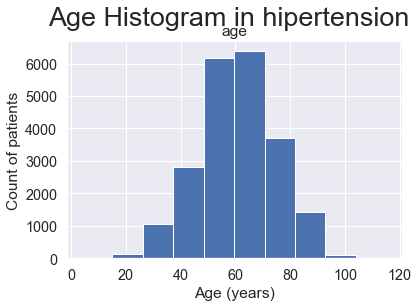

In [87]:
# histogram for column: 'age'
fig, axes = plt.subplots(nrows=1, ncols=1)
df_of_hipertension.hist(column='age', ax=axes)

# set title and axis labels
plt.suptitle('Age Histogram in hipertension', x=0.5, y=1, ha='center', fontsize='xx-large')
plt.xlabel('Age (years)')
plt.ylabel('Count of patients');

__- 'Normal distributed', and the majority of patients have hypertension are between 40 and 80 years old.__

 ____________________________________________________________________________________________________________________________

# Q4:

__4- Are there young alcoholics (under 18)?__

In [234]:
# data_frame of alcoholics
df_of_alcoholics = noshow_df.query('alcoholism==1')
# df_of_alcoholics

In [166]:
# count of alcoholics
count_of_alcoholics = noshow_df.query('alcoholism==1').alcoholism.count()
count_of_alcoholics

3360

In [246]:
# count of under_18 in alcoholics
count_of_under_18_in_alcoholics = df_of_alcoholics.query('age<=18').age.count()
count_of_under_18_in_alcoholics

28

In [247]:
# percent of under_18 in alcoholics
percent_of_under_18_in_alcoholics = percent_(df_of_alcoholics, count_of_under_18_in_alcoholics, count_of_alcoholics)
percent_of_under_18_in_alcoholics

0.8333333333333334

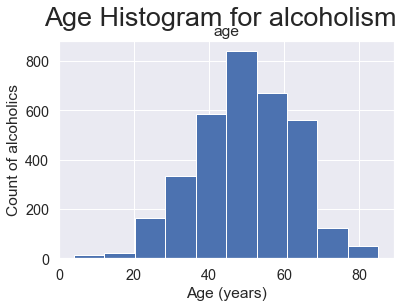

In [90]:
# histogram for column: 'age'
fig, axes = plt.subplots(nrows=1, ncols=1)
df_of_alcoholics.hist(column='age', ax=axes)

# set title and axis labels
plt.suptitle('Age Histogram for alcoholism', x=0.5, y=1, ha='center', fontsize='xx-large')
plt.xlabel('Age (years)')
plt.ylabel('Count of alcoholics');

__- less than 1% of alcoholics are under 20.__

 ____________________________________________________________________________________________________________________________

# Q5:

__5- What is the percentage of patients who showed up to their appointments?__

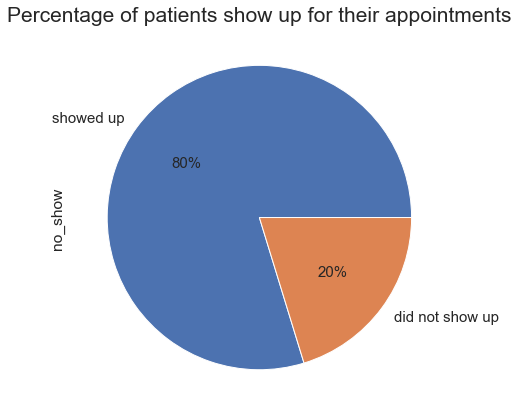

In [93]:
# percentage of patients who show up for their appointments
noshow_df.no_show.value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={"fontsize":15}, figsize= (7,7),  labels=['showed up', 'did not show up'])
plt.title("Percentage of patients show up for their appointments", fontsize = 21);

__- 80% of the patients showed up to their appointments.__

 ____________________________________________________________________________________________________________________________

# Q6:

__6- Did the patients who showed up to their appointments receive SMS?__

In [102]:
# data_frame of the patients who showed up to their appointments
df_of_show_ups = noshow_df.query('no_show=="No"')

In [103]:
# count of the patients who showed up to their appointments
count_of_show_ups = noshow_df.query('no_show=="No"').no_show.count()
count_of_show_ups

85307

In [104]:
# data_frame of the patients who received SMS and showed up to their appointments
df_of_show_ups_received_sms = df_of_show_ups.query('sms_received==1')

In [105]:
# count of the patients who received SMS and showed up to their appointments
count_of_show_ups_received_sms = df_of_show_ups.query('sms_received==1').sms_received.count()
count_of_show_ups_received_sms

25017

In [106]:
# percentage of the patients who received SMS and showed up to their appointments
percent_of_show_ups_received_sms = percent_(df_of_show_ups, count_of_show_ups_received_sms, count_of_show_ups)
percent_of_show_ups_received_sms

29.325846647989028

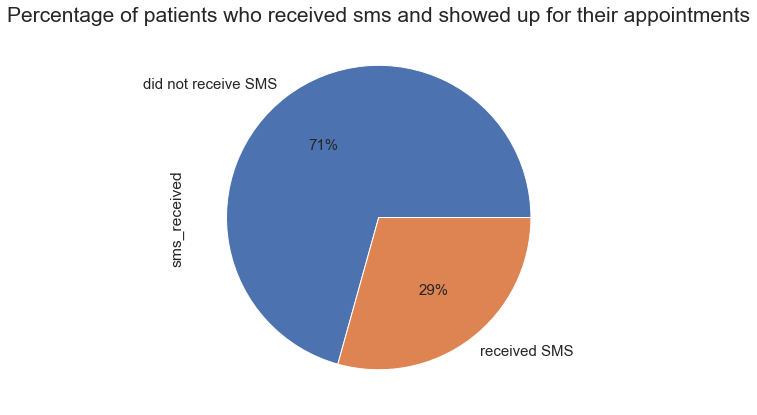

In [107]:
# percentage of patients who received sms and showed up for their appointments

df_of_show_ups['sms_received'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={"fontsize":15}, figsize= (7,7), labels=['did not receive SMS', 'received SMS'])

plt.title("Percentage of patients who received sms and showed up for their appointments", fontsize = 21);


__- about 29% of the patients who showed up to their appointments received SMS.__

 ____________________________________________________________________________________________________________________________

# Conclusions:

__- percent of females is about twice the percent of male patients (66% vs 34%).__

__- the majority of patients are under 70 years old.__

__- alcohol increases the proportions of diabetes and hipertension (10% vs 7% diabetes and 39.5% vs 20% hipertension).__

__- most of the patients who have diabetes are between 50 and 80 years old.__

__- small percent (less than 1%) of alcoholics are under 18 years old (good).__

__- 80% of the patients showed up to their appointments, this is good.__

__- 29% of patients who showed up to their appointments received SMS, SMS does not help.__

 ____________________________________________________________________________________________________________________________

# Limitations:

__- Features like job, education, and family may change the result.__

__- 0 or less Ages are fake and that leads to dropping these records.__

__- ways like mobile calls to the patient or his/her relatives instead of SMS may help.__

__- A discount in the visita may encourages more patients to show up to their appointments.__